# Automated Machine Learning

This day i wanna learn and try about Automated Machine Learning using TPOT, Tree-based Pipeline Optimization Tool, is a Python library for automated machine learning. TPOT uses a tree-based structure to represent a model pipeline for a predictive modeling problem, including data preparation and modeling algorithms and model hyperparameters.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data exploration

In [5]:
data.describe()
print("The size of the dataframe is:",data.shape)

The size of the dataframe is: (145460, 23)


In [6]:
# check for null values
data_missing = data.isnull().sum()

# calculate the % of missing values
perc_missing = round(100*(data_missing/len(data)),2)
perc_missing

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

In [7]:
# dropping columns with large % of missing values 

data_dropped = data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [8]:
# And we need to replace NaN values with mean values of each column:
data_dropped.fillna(data_dropped.mean(), inplace=True)

# Dropping the NaN values from the data as they can be problematic 
data_dropped.dropna(inplace=True)

data_dropped.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [9]:
print("The new size of the dataframe is:", data_dropped.shape)
print("We deleted",data.shape[0]-data_dropped.shape[0],"rows and", data.shape[1]-data_dropped.shape[1],"columns.")
data_dropped.dtypes

The new size of the dataframe is: (123710, 19)
We deleted 21750 rows and 4 columns.


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
# change date type to datetime

data_dropped['Date'] = pd.to_datetime(data_dropped['Date'])
# Adding columns Year and Month

data_dropped['Year'] = pd.to_datetime(data_dropped['Date']).dt.year
data_dropped['Month'] = pd.to_datetime(data_dropped['Date']).dt.month

# set Date as index

data_dropped.set_index('Date', inplace=True)
data_dropped.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Date,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12


# Data Visualisation 

Text(0.5, 1.0, 'Rainfall throughout the Years')

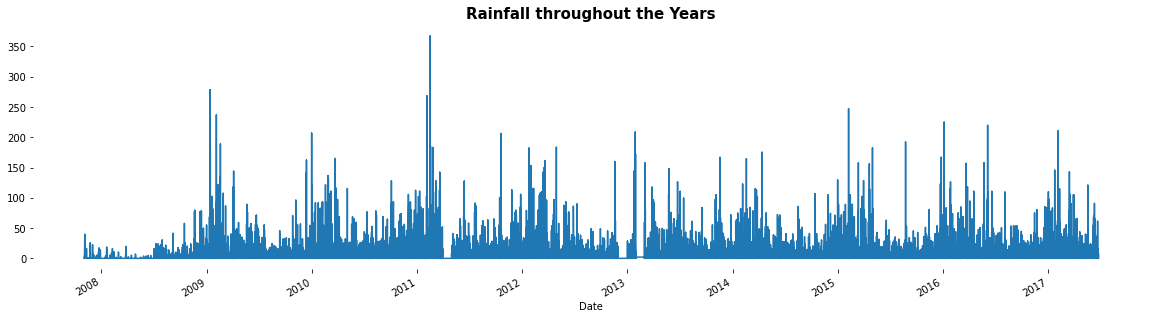

In [11]:
plt.figure(figsize=(20,5))
data_dropped['Rainfall'].plot()
plt.box(False)
plt.title ('Rainfall throughout the Years',fontweight="bold", fontsize=15)

Text(0.5, 1.0, 'Rainfall throughout Months')

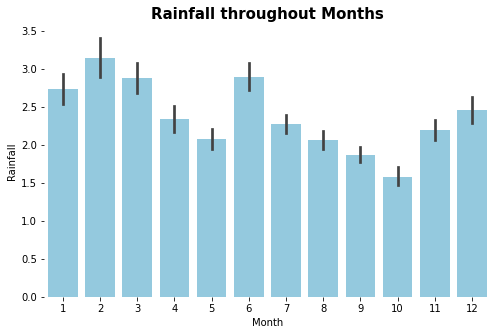

In [12]:
# plotting Rainfall per Month
plt.figure(figsize=(8,5))
sns.barplot(x = 'Month', y='Rainfall', data=data_dropped, color = 'skyblue')
plt.box(False)
plt.title ('Rainfall throughout Months', fontweight="bold",fontsize=15)

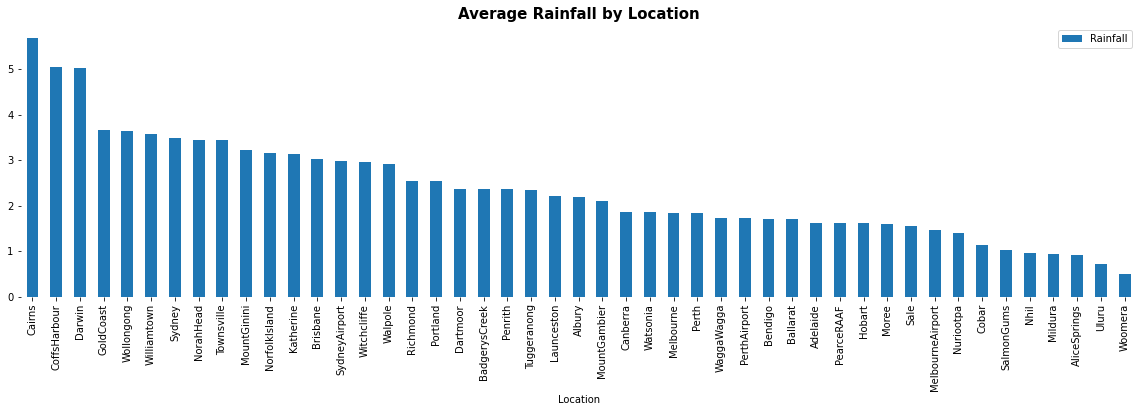

In [13]:
# plotting average Rainfall by Location
data_loc = data_dropped.groupby('Location').agg({'Rainfall':'mean'}).sort_values(by='Rainfall', ascending=False) 

data_loc.plot(kind='bar',figsize=(20,5))
plt.box(False)
plt.title ('Average Rainfall by Location', fontsize=15, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Highest Temperature and Amount of Rainfall')

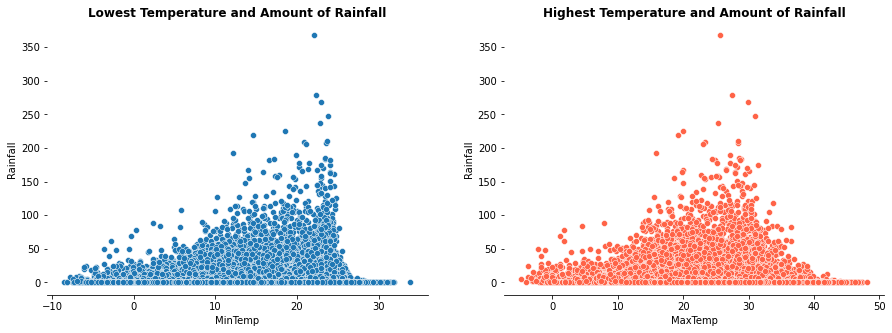

In [14]:
# Plotting Temperature and Rainfall

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.despine(left=True)
sns.scatterplot(x='MinTemp', y='Rainfall', data=data_dropped, ax=ax1)
ax1.set_title("Lowest Temperature and Amount of Rainfall",fontweight="bold")
sns.scatterplot(x='MaxTemp', y='Rainfall', data=data_dropped, color="tomato", ax=ax2)
ax2.set_title("Highest Temperature and Amount of Rainfall",fontweight="bold")

# Data Preparation 

In [15]:
# Renaming Dataframe for the Machine Learning Part
data_ML = data_dropped

In [16]:
# Dropping columns that we do not need for the model building part
data_ML = data_ML.drop(['Location','Year'], axis=1)

In [17]:
# Adjusting the Target Variables' values: Yes/No with 1/0
data_ML = data_ML.replace({'RainTomorrow':'Yes','RainToday':'Yes'},1)
data_ML = data_ML.replace({'RainTomorrow':'No','RainToday':'No'},0)

In [18]:
# Using labelEncoder to assign numeric values to the string data , according to the label.
le = LabelEncoder()
data_ML['WindGustDir'] = le.fit_transform(data_ML['WindGustDir'])
data_ML['WindDir9am'] = le.fit_transform(data_ML['WindDir9am'])
data_ML['WindDir3pm'] = le.fit_transform(data_ML['WindDir3pm'])
data_ML.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
Date,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12
2008-12-02,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12
2008-12-03,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12
2008-12-04,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12
2008-12-05,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12


In [19]:
# Correlation
# Create Correlation mask >0.5:
data_ML_corr = data_ML.corr()
condition = abs(data_ML.corr()) > 0.5
#data_ML_corr[condition]

<AxesSubplot:>

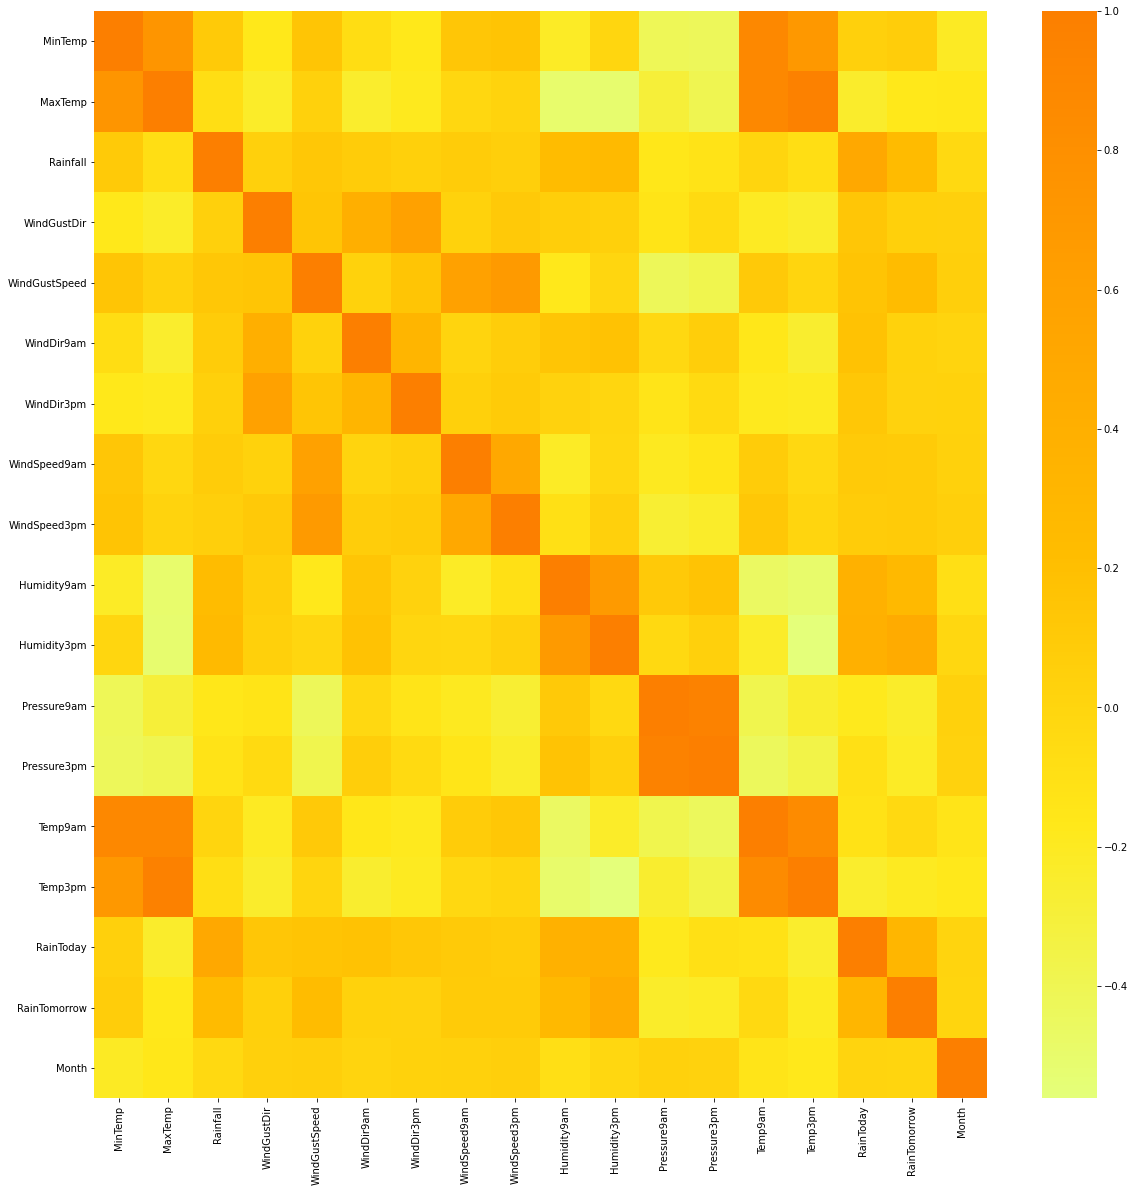

In [20]:
# heatmap
# correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(data_ML.corr(), cmap = 'Wistia')

In [21]:
# Dropping highly correlated columns

data_ML = data_ML.drop(['WindGustSpeed','Humidity9am',], axis=1)

# Feature Scaling 

In [22]:
# Standardize our Data - Feature Scaling 0-1 scale 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
data_scaled = pd.DataFrame(scaler.fit_transform(data_ML), columns=data_ML.columns)

data_scaled.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,0.516509,0.523629,0.001632,0.866667,0.866667,0.933333,0.211765,0.258824,0.22,0.449587,0.4800,0.508439,0.522073,0.0,0.0,1.0
1,0.375000,0.565217,0.000000,0.933333,0.400000,1.000000,0.023529,0.235294,0.25,0.497521,0.4912,0.514768,0.570058,0.0,0.0,1.0
2,0.504717,0.576560,0.000000,1.000000,0.866667,1.000000,0.200000,0.282353,0.30,0.447934,0.5056,0.594937,0.548944,0.0,0.0,1.0
3,0.417453,0.620038,0.000000,0.266667,0.600000,0.000000,0.105882,0.082353,0.16,0.613223,0.5712,0.533755,0.612284,0.0,0.0,1.0
4,0.613208,0.701323,0.002720,0.866667,0.066667,0.466667,0.058824,0.211765,0.33,0.500826,0.4624,0.527426,0.673704,0.0,0.0,1.0


# Feature Selection

In [23]:
# Selection of the most important features using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

X = data_scaled.loc[:,data_scaled.columns!='RainTomorrow']
y = data_scaled[['RainTomorrow']]

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
print("The 5 most important features are:", X.columns[selector.get_support(indices=True)]) 

The 5 most important features are: Index(['Rainfall', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday'], dtype='object')


In [24]:
# Creating a new dataframe with the most important features

data_new = data_scaled[['Rainfall', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
                    'RainTomorrow']]

# Checking the Target variables' distribution

In [25]:
data_new['RainTomorrow'].value_counts()[0]

96318

In [26]:
Percentage_No = data_new['RainTomorrow'].value_counts()[0]/len(data_new['RainTomorrow'])*100
Percentage_Yes = data_new['RainTomorrow'].value_counts()[1]/len(data_new['RainTomorrow'])*100

0.0    96318
1.0    27392
Name: RainTomorrow, dtype: int64
Percentage Occurences of No Rain on the following day: 77.86 %
Percentage Occurences of Rain on the following day: 22.14 %


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


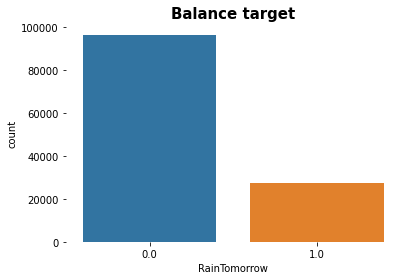

In [27]:
# checking the distribution of our target variable 
print(data_new['RainTomorrow'].value_counts())

print("Percentage Occurences of No Rain on the following day:", round(Percentage_No,2),"%")
print("Percentage Occurences of Rain on the following day:", round(Percentage_Yes,2),"%")

sns.countplot(data_new['RainTomorrow'])
plt.title('Balance target',fontsize=15, fontweight='bold')
plt.box(False)

In [28]:
data_new.shape

(123710, 6)

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

y = data_new['RainTomorrow']
X = data_new.drop(['RainTomorrow'], axis = 1)

# Train-Test Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [30]:
data_new.info

<bound method DataFrame.info of         Rainfall  Humidity3pm  Pressure9am   Temp3pm  RainToday  RainTomorrow
0       0.001632         0.22     0.449587  0.522073        0.0           0.0
1       0.000000         0.25     0.497521  0.570058        0.0           0.0
2       0.000000         0.30     0.447934  0.548944        0.0           0.0
3       0.000000         0.16     0.613223  0.612284        0.0           0.0
4       0.002720         0.33     0.500826  0.673704        0.0           0.0
...          ...          ...          ...       ...        ...           ...
123705  0.000000         0.27     0.730579  0.504798        0.0           0.0
123706  0.000000         0.24     0.728926  0.533589        0.0           0.0
123707  0.000000         0.21     0.710744  0.573896        0.0           0.0
123708  0.000000         0.24     0.669421  0.604607        0.0           0.0
123709  0.000000         0.24     0.642975  0.602687        0.0           0.0

[123710 rows x 6 columns]>

# TPOT Training

In [31]:
!pip install tpot

In [32]:
import time
from tpot import TPOTClassifier


# Construct and fit TPOT classifier
start_time = time.time()
tpot = tpot = TPOTClassifier(generations=5,verbosity=2,population_size=50,scoring='accuracy',
                             max_eval_time_mins=2,periodic_checkpoint_folder='/content/drive/MyDrive/Colab Notebooks/Checkpoint TPOT')

tpot.fit(X_train,y_train) 
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8418276667806023

Generation 2 - Current best internal CV score: 0.8418276667806023

Generation 3 - Current best internal CV score: 0.8421105828368987

Generation 4 - Current best internal CV score: 0.8422520449489438

Generation 5 - Current best internal CV score: 0.8422520449489438

Best pipeline: XGBClassifier(SGDClassifier(input_matrix, alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.5, learning_rate=constant, loss=log, penalty=elasticnet, power_t=10.0), learning_rate=0.01, max_depth=10, min_child_weight=14, n_estimators=100, n_jobs=1, subsample=0.6500000000000001, verbosity=0)
TPOT classifier finished in 11468.5154671669 seconds
Best pipeline test accuracy: 0.840


# Result

In [40]:
# Results
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test, y_test))

Best pipeline test accuracy: 0.840


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tpot.predict(X_test)

print('MAE',mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('MSE',mean_squared_error(y_pred=y_pred, y_true=y_test))
print('R2',r2_score(y_pred=y_pred, y_true=y_test))

MAE 0.16041548783445153
MSE 0.16041548783445153
R2 0.06943352161287875


In [42]:
import sklearn.metrics
y_predictions = tpot.predict(X_test)
acc= sklearn.metrics.accuracy_score(y_true=y_test,
                                     y_pred=y_predictions)
print("Accuracy:", acc)

Accuracy: 0.8395845121655484


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     19264
         1.0       0.73      0.44      0.55      5478

    accuracy                           0.84     24742
   macro avg       0.79      0.70      0.73     24742
weighted avg       0.83      0.84      0.82     24742



In [44]:
data_test = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [45]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.7271906052393857


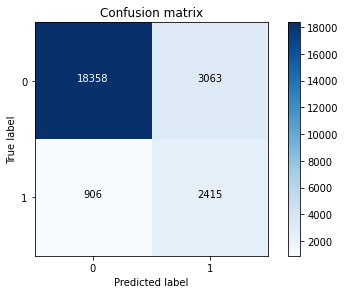

In [46]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_predictions,y_test)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()